In [ ]:
#based on https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/
#download csv file from
#https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line
#tried wget link but got html
# scp -i /blah/blah.pem /blah/international-airline-passengers.csv ubuntu@blah:/blah/

In [2]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense


Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)


In [5]:
import keras
print keras.__version__
#NB: keras 1.x series has different syntax to keras 2.x

1.2.2


In [6]:
# fix random seed for reproducibility
numpy.random.seed(7)
#set constants


In [7]:
def getVariablesClass(inst):
    var = []
    cls = inst.__class__
    for v in cls.__dict__:
        if not callable(getattr(cls, v)):
            var.append(v)

    return var

In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [9]:
#NB: quick view of file contents
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', engine='python', skipfooter=3)
print dataframe.shape
dataframe.columns = ['year-month', 'passengers']
print dataframe.head(5)


(143, 2)
  year-month  passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121


In [10]:
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
print dataframe.shape
print dataframe.head(5)
dataset = dataframe.values
print type(dataset), dataset.shape
dataset = dataset.astype('float32')


(143, 1)
   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0                                                112                             
1                                                118                             
2                                                132                             
3                                                129                             
4                                                121                             
<type 'numpy.ndarray'> (143, 1)


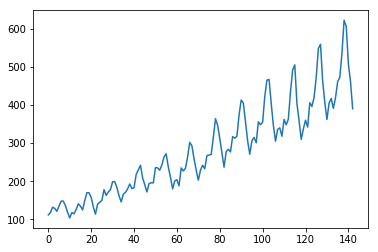

In [11]:
plt.plot(dataset)
plt.show()

In [12]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print ("train:", train.shape)
print ("test:", test.shape)

('train:', (95, 1))
('test:', (48, 1))


In [13]:
# reshape dataset
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print "trainX:", trainX.shape, "trainY:", trainY.shape
print "testX:", testX.shape, "testY:", testY.shape

trainX: (74, 20) trainY: (74,)
testX: (27, 20) testY: (27,)


In [14]:
print trainX[0:3]

[[ 112.  118.  132.  129.  121.  135.  148.  148.  136.  119.  104.  118.
   115.  126.  141.  135.  125.  149.  170.  170.]
 [ 118.  132.  129.  121.  135.  148.  148.  136.  119.  104.  118.  115.
   126.  141.  135.  125.  149.  170.  170.  158.]
 [ 132.  129.  121.  135.  148.  148.  136.  119.  104.  118.  115.  126.
   141.  135.  125.  149.  170.  170.  158.  133.]]


In [15]:
# create and fit Multilayer Perceptron model
model = Sequential()
print type(model)
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


<class 'keras.models.Sequential'>


In [16]:
history = model.fit(trainX, trainY, batch_size=2, nb_epoch=400, verbose=2)


Epoch 1/400
0s - loss: 39044.8369
Epoch 2/400
0s - loss: 10294.5220
Epoch 3/400
0s - loss: 1299.9916
Epoch 4/400
0s - loss: 811.2420
Epoch 5/400
0s - loss: 714.5008
Epoch 6/400
0s - loss: 676.4970
Epoch 7/400
0s - loss: 632.9793
Epoch 8/400
0s - loss: 577.6404
Epoch 9/400
0s - loss: 602.2141
Epoch 10/400
0s - loss: 541.2186
Epoch 11/400
0s - loss: 507.9947
Epoch 12/400
0s - loss: 477.2059
Epoch 13/400
0s - loss: 467.0085
Epoch 14/400
0s - loss: 460.4873
Epoch 15/400
0s - loss: 461.5332
Epoch 16/400
0s - loss: 464.0448
Epoch 17/400
0s - loss: 439.9667
Epoch 18/400
0s - loss: 439.4771
Epoch 19/400
0s - loss: 467.2776
Epoch 20/400
0s - loss: 388.3777
Epoch 21/400
0s - loss: 436.8145
Epoch 22/400
0s - loss: 378.5644
Epoch 23/400
0s - loss: 331.4400
Epoch 24/400
0s - loss: 341.5525
Epoch 25/400
0s - loss: 419.4361
Epoch 26/400
0s - loss: 333.1040
Epoch 27/400
0s - loss: 362.4787
Epoch 28/400
0s - loss: 301.9155
Epoch 29/400
0s - loss: 313.7917
Epoch 30/400
0s - loss: 288.2389
Epoch 31/400
0

0s - loss: 122.0406
Epoch 249/400
0s - loss: 145.2259
Epoch 250/400
0s - loss: 145.8827
Epoch 251/400
0s - loss: 126.4576
Epoch 252/400
0s - loss: 115.7969
Epoch 253/400
0s - loss: 85.0984
Epoch 254/400
0s - loss: 100.8113
Epoch 255/400
0s - loss: 101.1346
Epoch 256/400
0s - loss: 95.2408
Epoch 257/400
0s - loss: 90.6272
Epoch 258/400
0s - loss: 108.1461
Epoch 259/400
0s - loss: 114.8148
Epoch 260/400
0s - loss: 109.4257
Epoch 261/400
0s - loss: 112.5203
Epoch 262/400
0s - loss: 105.2221
Epoch 263/400
0s - loss: 85.6864
Epoch 264/400
0s - loss: 102.0096
Epoch 265/400
0s - loss: 97.4140
Epoch 266/400
0s - loss: 103.8336
Epoch 267/400
0s - loss: 96.1955
Epoch 268/400
0s - loss: 113.4863
Epoch 269/400
0s - loss: 91.0781
Epoch 270/400
0s - loss: 95.5310
Epoch 271/400
0s - loss: 89.5200
Epoch 272/400
0s - loss: 99.8059
Epoch 273/400
0s - loss: 96.3501
Epoch 274/400
0s - loss: 146.1101
Epoch 275/400
0s - loss: 128.1447
Epoch 276/400
0s - loss: 90.7517
Epoch 277/400
0s - loss: 107.1032
Epoch 

In [17]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 12)            252         dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 8)             104         dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 1)             9           dense_2[0][0]                    
Total params: 365
Trainable params: 365
Non-trainable params: 0
____________________________________________________________________________________________________


In [18]:
type(history)

keras.callbacks.History

['loss']


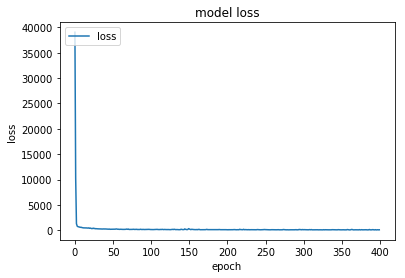

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()


In [20]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 202.26 MSE (14.22 RMSE)
Test Score: 689.53 MSE (26.26 RMSE)


In [21]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [22]:
print type(trainPredict), trainPredict.shape
print type(testPredict), testPredict.shape


<type 'numpy.ndarray'> (74, 1)
<type 'numpy.ndarray'> (27, 1)


In [23]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
print "trainPredictPlot.shape:", trainPredictPlot.shape
print "trainPredict.shape:", trainPredict.shape
#print trainPredictPlot[0:20]
trainPredictPlot[:, :] = numpy.nan
#now set trainPredictPlot 
print "look_back:", look_back, "len(trainPredict)+look_back:", len(trainPredict)+look_back
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


trainPredictPlot.shape: (143, 1)
trainPredict.shape: (74, 1)
look_back: 20 len(trainPredict)+look_back: 94


In [24]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


In [25]:
#identify errors
print trainPredictPlot.shape
print testPredictPlot.shape
print dataset.shape
error = []
for i in range(trainPredictPlot.shape[0]):
    if trainPredictPlot[i,0]
    print trainPredictPlot[i,0], testPredictPlot[i,0]
    error.append(trainPredictPlot[i,0]-testPredictPlot[i,0])
    break
error = numpy.array(error)
print error.shape
print error[0:20]

(143, 1)
(143, 1)
(143, 1)
nan nan
(1,)
[ nan]


In [26]:
print trainPredictPlot

[[          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [          nan]
 [ 149.78343201]
 [ 127.58139038]
 [ 115.54278564]
 [ 128.49168396]
 [ 137.15719604]
 [ 139.15354919]
 [ 161.54449463]
 [ 151.15611267]
 [ 151.03839111]
 [ 174.07948303]
 [ 192.75218201]
 [ 187.70599365]
 [ 173.69166565]
 [ 153.11271667]
 [ 136.00218201]
 [ 155.6612854 ]
 [ 163.55465698]
 [ 169.05838013]
 [ 190.34393311]
 [ 186.31048584]
 [ 176.79740906]
 [ 203.90187073]
 [ 214.4453125 ]
 [ 221.61637878]
 [ 201.29518127]
 [ 178.39849854]
 [ 164.87615967]
 [ 182.29380798]
 [ 189.04324341]
 [ 190.33322144]
 [ 208.37574768]
 [ 198.39526367]
 [ 220.82354736]
 [ 240.42590332]
 [ 258.62536621]
 [ 249.58726501]
 [ 236.95469666]
 [ 200.39807129]
 [ 187.3564453

fig_size: [6.0, 4.0]


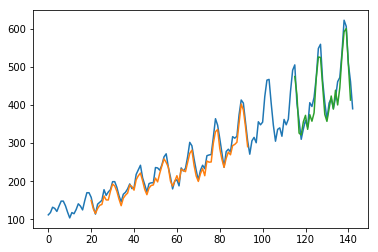

In [27]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
fig_size = plt.rcParams["figure.figsize"]
print "fig_size:", fig_size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()


fig_size: [12.0, 9.0]


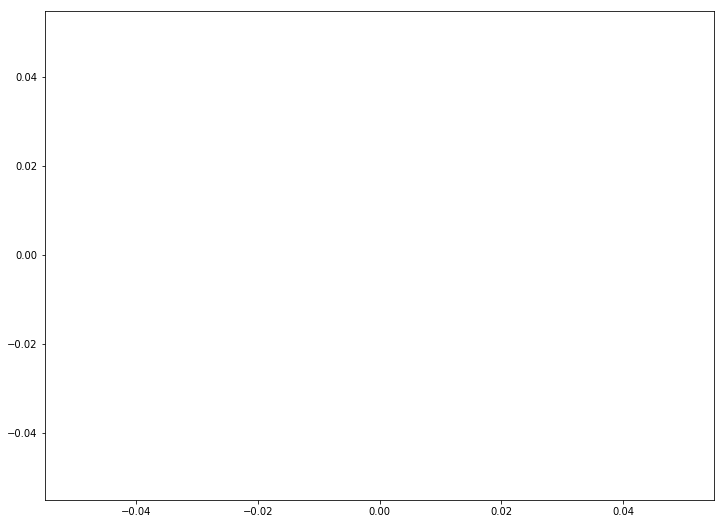

In [28]:
plt.plot(error)
fig_size = plt.rcParams["figure.figsize"]
print "fig_size:", fig_size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
